In [3]:
import pandas as pd, matplotlib.pyplot as plt, sqlite3, numpy as np, seaborn as sbn

In [4]:
con= sqlite3.connect("/Users/clairecrain/Documents/Data Stuff/archive (1)/database.sqlite")

In [5]:
cur = con.cursor()

In [8]:
cur.execute('Drop Table if exists RankNames;')

cur.execute('Create temporary Table if not exists RankNames as Select * from (select Name,Gender,Year,Count,row_number() over (partition by year, gender order by count desc) as NameRank from NationalNames) where NameRank<=5;')

cur.execute('Select * from RankNames')


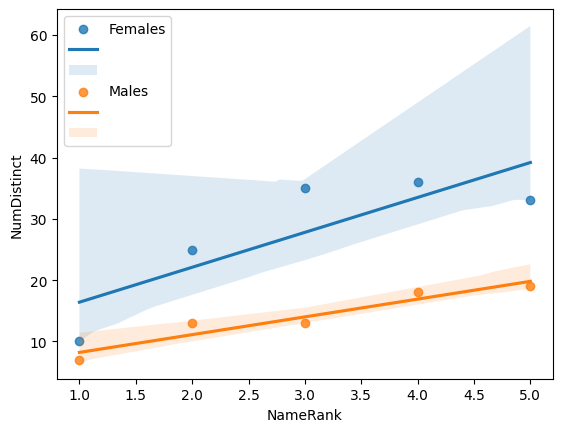

In [7]:
sqlF = """Select distinct NameRank,Gender,dense_rank() 
over (partition by NameRank, Gender order by name) +dense_rank() over
(partition by NameRank, Gender order by name desc) -1 as NumDistinct from RankNames 
where Gender='F';"""

sqlM = """Select distinct NameRank,Gender,dense_rank() 
over (partition by NameRank, Gender order by name) +dense_rank() over
(partition by NameRank, Gender order by name desc) -1 as NumDistinct from RankNames 
where Gender='M';"""

data1= pd.read_sql(sqlF, con)
data2= pd.read_sql(sqlM, con)

sbn.regplot(x=data1['NameRank'],y=data1['NumDistinct'])   
sbn.regplot(x=data2['NameRank'],y=data2['NumDistinct']) 

leg = plt.legend(loc="upper left",labels=["Females","","","Males","",""])
